# Comparing Client Tiers

Different data visualization practices.

## 1. Setup

### Set Paths and Options

In [26]:
* Folder path *;
%let rc = %sysfunc(filename(fr,.));
%let curdir = %sysfunc(pathname(&fr));
%let rc = %sysfunc(filename(fr));

%let path=&curdir;

* File name *;
%let file=Client Tier Share.xlsx;


59                                                         The SAS System                             12:36 Thursday, April 28, 2022

579        ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
579      ! ods graphics on / outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: _TOMODS1
580        
581        * Folder path *;
582        %let rc = %sysfunc(filename(fr,.));
583        %let curdir = %sysfunc(pathname(&fr));
584        %let rc = %sysfunc(filename(fr));
585        
586        %let path=&curdir;
587        
588        * File name *;
589        %let file=Client Tier Share.xlsx;
590        
591        
592        ods html5 (id=saspy_internal) close;ods listing;
593        

60                                                         The SAS System                             12:36 Thursday, April 28, 2022

594        


## 2. Access Data

Import th excel file and create a SAS table named **clients**.

In [27]:
proc import datafile="&path\Client Tier Share.xlsx"
            out=clients
            dbms=excel
            replace;
run;


61                                                         The SAS System                             12:36 Thursday, April 28, 2022

597        ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
597      ! ods graphics on / outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: _TOMODS1
598        

NOTE: The SAS System stopped processing this step because of errors.
NOTE: PROCEDURE DATASETS used (Total process time):
      real time           5.08 seconds
      cpu time            0.23 seconds
      


599        proc import datafile="&path\Client Tier Share.xlsx"
600                    out=clients
601                    dbms=excel
602                    replace;
603        run;

NOTE: WORK.CLIENTS data set was successfully created.
NOTE: The data set WORK.CLIENTS has 6 observations and 5 variables.
NOTE: PROCEDURE IMPORT used (Total process time):
      real time           0.16 seconds
      cpu time        

Preview and view the descriptor portion of the data.

In [28]:
* Print the first 10 rows *;
proc print data=clients(obs=10);
run;


* Descriptor portion *;

* Only select the column info *;
ods select Variables;

proc contents data=clients;
run;

Rename the columns by removing symbols and spaces.

In [ ]:
proc datasets library=work;
    modify clients;
    rename '# of Accounts'n=numAccounts
           '% Accounts'n=pctAccounts
           'Revenue ($M)'n=Revenue 
           '% Revenue'n=pctRevenue;
run;

## 3. Data Exploration

Preview the table.

In [30]:
proc print data=clients noobs;
run;

Tier,numAccounts,pctAccounts,Revenue,pctRevenue
A+,19,0.02,$3.90,0.21
A,77,0.07,$4.70,0.25
B,338,0.31,$6.00,0.32
C,425,0.39,$2.80,0.15
D,24,0.02,$0.40,0.02
All other,205,0.19,$0.90,0.05


Confirm the percentages add up to 1.

In [31]:
proc means data=clients sum nolabel;
    var pctAccounts pctRevenue;
run;

Variable,Sum
pctAccounts pctRevenue,1.0000000 1.0000000


Sort the data by client Tier.

In [32]:
proc sort data=clients;
    by Tier;
run;

proc print data=clients noobs;
run;

Tier,numAccounts,pctAccounts,Revenue,pctRevenue
A,77,0.07,$4.70,0.25
A+,19,0.02,$3.90,0.21
All other,205,0.19,$0.90,0.05
B,338,0.31,$6.00,0.32
C,425,0.39,$2.80,0.15
D,24,0.02,$0.40,0.02


Need to prepare the data by creating a user defined sort order. Order should be:
1. A+
2. A
3. B
4. C
5. D
6. All other

## 4. Data Preparation

### a. Create new sort order of the data.

In [33]:
* Create a new column indicating the new sort order *;
data clientsSorted;
    set clients;
    if Tier='A+' then Order=1;
        else if Tier='A' then Order=2;
        else if Tier='B' then Order=3;
        else if Tier='C' then Order=4;
        else if Tier='D' then Order=5;
        else if Tier='All other' then Order=6;
run;

* Sort the data by the new Order column for a user defined order *;
proc sort data=clientsSorted;
    by Order;
run;

* Preview the data *;
proc print data=clientsSorted noobs;
run;

Tier,numAccounts,pctAccounts,Revenue,pctRevenue,Order
A+,19,0.02,$3.90,0.21,1
A,77,0.07,$4.70,0.25,2
B,338,0.31,$6.00,0.32,3
C,425,0.39,$2.80,0.15,4
D,24,0.02,$0.40,0.02,5
All other,205,0.19,$0.90,0.05,6


### b. Transpose the data into narrow format.

In [34]:
proc transpose data=clientsSorted
               out=clientsFinal(rename=(col1=pct _label_=AccountType))
               name=Type;
    by Tier notsorted;
    var pctAccounts pctRevenue;
run;

proc print data=clientsFinal noobs;
run;

Tier,Type,AccountType,pct
A+,pctAccounts,% Accounts,0.02
A+,pctRevenue,% Revenue,0.21
A,pctAccounts,% Accounts,0.07
A,pctRevenue,% Revenue,0.25
B,pctAccounts,% Accounts,0.31
B,pctRevenue,% Revenue,0.32
C,pctAccounts,% Accounts,0.39
C,pctRevenue,% Revenue,0.15
D,pctAccounts,% Accounts,0.02
D,pctRevenue,% Revenue,0.02


### c. Find the largest value in each Account Type and create a new column.

Max value of the Account percentage and Revenue percentage.

In [35]:
proc sql noprint;
select max(pct)
    into :maxAccount trimmed
    from clientsFinal
    where AccountType="% Accounts";
quit;

proc sql noprint;
select max(pct)
    into :maxRevenue trimmed
    from clientsFinal
    where AccountType="% Revenue";
quit;

%put &=maxAccount &=maxRevenue;


77                                                         The SAS System                             12:36 Thursday, April 28, 2022

732        ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
732      ! ods graphics on / outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: _TOMODS1
733        
734        proc sql noprint;
735        select max(pct)
736            into :maxAccount trimmed
737            from clientsFinal
738            where AccountType="% Accounts";
739        quit;
NOTE: PROCEDURE SQL used (Total process time):
      real time           0.00 seconds
      cpu time            0.00 seconds
      

740        
741        proc sql noprint;
742        select max(pct)
743            into :maxRevenue trimmed
744            from clientsFinal
745            where AccountType="% Revenue";
746        quit;
NOTE: PROCEDURE SQL used (Total process time):
      real time           0.00 seconds
      c

In [36]:
proc print data=clientsFinal noobs;
run;

Tier,Type,AccountType,pct
A+,pctAccounts,% Accounts,0.02
A+,pctRevenue,% Revenue,0.21
A,pctAccounts,% Accounts,0.07
A,pctRevenue,% Revenue,0.25
B,pctAccounts,% Accounts,0.31
B,pctRevenue,% Revenue,0.32
C,pctAccounts,% Accounts,0.39
C,pctRevenue,% Revenue,0.15
D,pctAccounts,% Accounts,0.02
D,pctRevenue,% Revenue,0.02


In [37]:
data clientsFinal;
    set clientsFinal;
    if AccountType='% Accounts' then do;
        if pct=&maxAccount then Max='Yes';
        else Max='No';
    end;
    if AccountType='% Revenue' then do;
        if pct=&maxRevenue then Max='Yes';
        else Max='No';
    end;
run;

proc print data=clientsFinal;
run;

Obs,Tier,Type,AccountType,pct,Max
1,A+,pctAccounts,% Accounts,0.02,No
2,A+,pctRevenue,% Revenue,0.21,No
3,A,pctAccounts,% Accounts,0.07,No
4,A,pctRevenue,% Revenue,0.25,No
5,B,pctAccounts,% Accounts,0.31,No
6,B,pctRevenue,% Revenue,0.32,Yes
7,C,pctAccounts,% Accounts,0.39,Yes
8,C,pctRevenue,% Revenue,0.15,No
9,D,pctAccounts,% Accounts,0.02,No
10,D,pctRevenue,% Revenue,0.02,No


## 5. Data Visualization

Initial visualization. General title and graph to show the data.


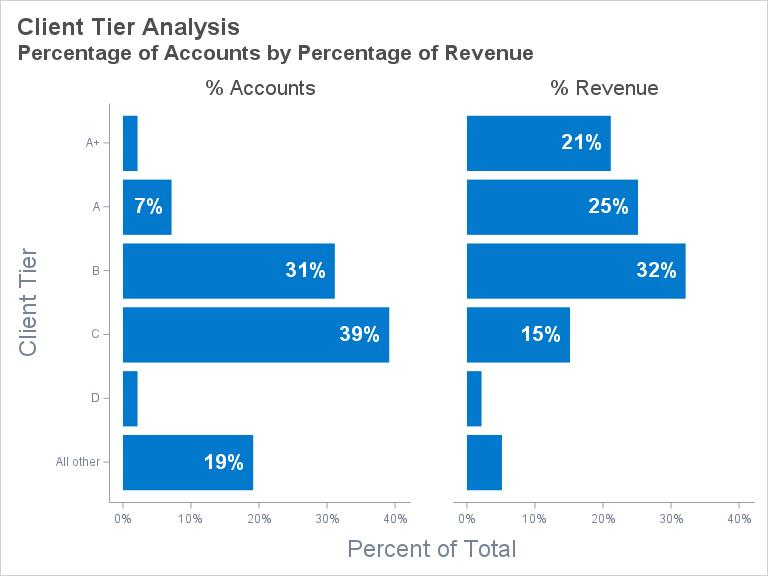

In [47]:
ods listing gpath="&path/images";
ods graphics / width=8in imagename="clientspanel" imagefmt=jpeg;

title j=left c=charcoal h=16pt "Client Tier Analysis";
title2 j=left c=charcoal h=14pt "Percentage of Accounts by Percentage of Revenue";

proc sgpanel data=clientsFinal;
    panelby AccountType /
               novarname 
               noborder 
               nowall 
               noheaderborder 
               headerbackcolor=white
               headerattrs=(color=charcoal size=14pt) 
               spacing=35;
    hbar Tier /
                response=pct
                fillattrs=(color=cx0379cd)
                nooutline
                datalabel 
                datalabelfitpolicy=insidepreferred
                datalabelattrs=(color=white size=14pt weight=bold)
                displaybaseline=off;
    rowaxis labelattrs=(color=cx768396 size=16pt)
            valueattrs=(color=cx768396)
            label="Client Tier" 
            discreteorder=data;
    colaxis labelattrs=(color=cx768396 size=16pt)
            valueattrs=(color=cx768396)
            label="Percent of Total";
    styleattrs datacolors=(red green);
    format pct percent7.;
run;
title;

ods graphics / reset;

Updated visualization. Added color to the graph to focus the users attention, and the title is more specific.


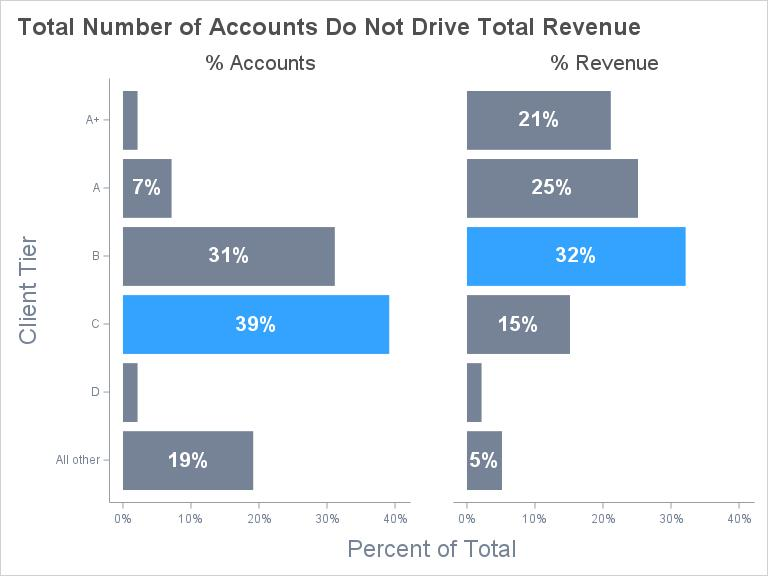

In [48]:
ods listing gpath="&path/images";
ods graphics / width=8in imagename="clientspanel_color" imagefmt=jpeg;

title j=left c=charcoal h=16pt "Total Number of Accounts Do Not Drive Total Revenue";
proc sgpanel data=clientsFinal noautolegend;
    panelby AccountType /
               novarname 
               noborder 
               nowall 
               noheaderborder 
               headerbackcolor=white
               headerattrs=(color=charcoal size=14pt) 
               spacing=35;
    hbar Tier /
                response=pct
                group=Max
                nooutline
                seglabel 
                seglabelattrs=(color=white size=14pt weight=bold)
                displaybaseline=off;
    rowaxis labelattrs=(color=cx768396 size=16pt)
            valueattrs=(color=cx768396)
            label="Client Tier" 
            discreteorder=data;
    colaxis labelattrs=(color=cx768396 size=16pt)
            valueattrs=(color=cx768396)
            label="Percent of Total";
    styleattrs datacolors=(cx768396 cx33a3ff);
    format pct percent7.;
run;
title;

ods graphics / reset;

This visualization will use clustered bar charts instead of paneled cell graphs.


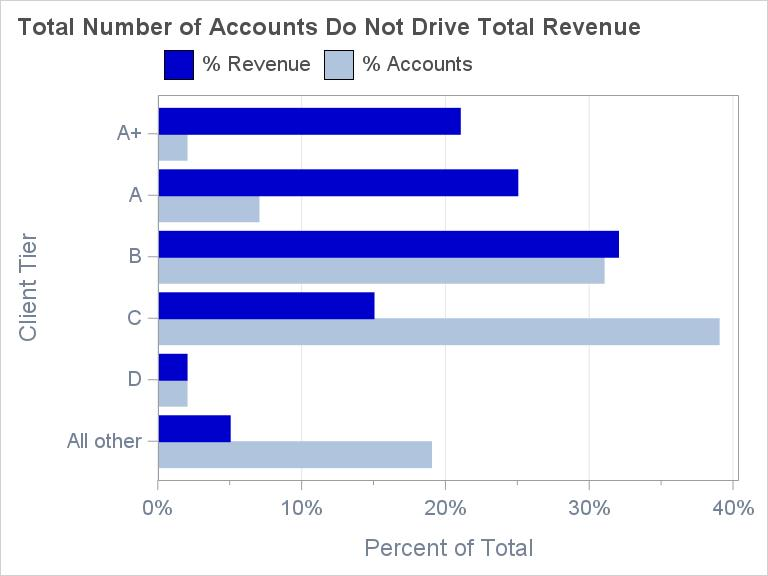

In [49]:
ods listing gpath="&path/images";
ods graphics / width=8in imagename="clients_dual_bar" imagefmt=jpeg;

title j=left c=charcoal h=16pt "Total Number of Accounts Do Not Drive Total Revenue";
proc sgplot data=clientsFinal;
    hbar Tier /
                response=pct
                group=AccountType
                groupdisplay=cluster
                nooutline
                displaybaseline=off;
    yaxis labelattrs=(color=cx768396 size=16pt)
          valueattrs=(color=cx768396 size=14pt)
          label="Client Tier" 
          discreteorder=data;
    xaxis labelattrs=(color=cx768396 size=16pt)
          valueattrs=(color=cx768396 size=14pt)
          label="Percent of Total"
          minor
          grid;
    styleattrs datacolors=(LightSteelBlue MediumBlue);
    keylegend / noborder 
                title=""
                position=topLeft
                valueattrs=(size=14pt color=charcoal) 
                scale=2
                sortorder=descending;
    format pct percent7.;
run;
title;

ods graphics / reset;

Show the comparision using a line graph.

In [41]:
proc print data=clientsSorted;
run;

Obs,Tier,numAccounts,pctAccounts,Revenue,pctRevenue,Order
1,A+,19,0.02,$3.90,0.21,1
2,A,77,0.07,$4.70,0.25,2
3,B,338,0.31,$6.00,0.32,3
4,C,425,0.39,$2.80,0.15,4
5,D,24,0.02,$0.40,0.02,5
6,All other,205,0.19,$0.90,0.05,6



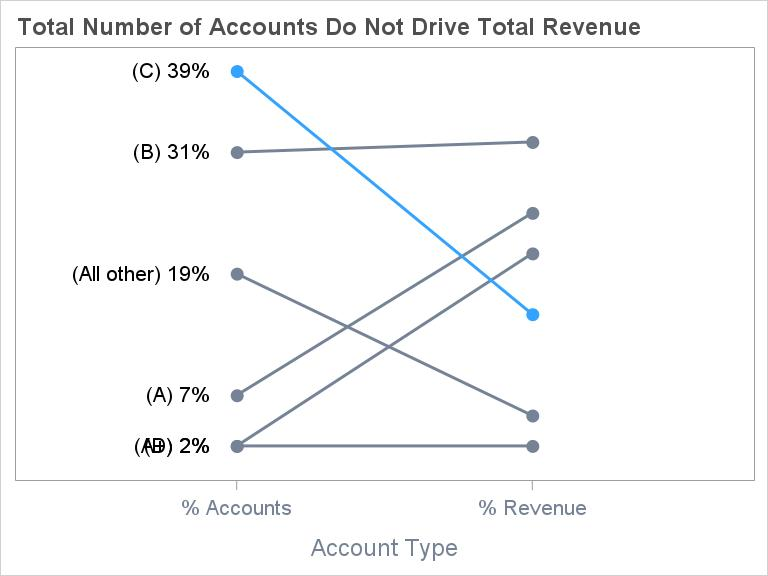

In [50]:
data anno;
    set clientsSorted;
    Length Tier $25;
    Function='text';
    Label=catx(" ",cats('(',Tier,')'),put(pctAccounts,percent5.1));
    y1Space="DataValue";
    x1=27;
    y1=pctAccounts;
    Anchor="right";
    TextSize=14;
    Width=25;
run;

ods listing gpath="&path/images";
ods graphics / width=8in imagename="clients_line" imagefmt=jpeg;

title j=left c=charcoal h=16pt "Total Number of Accounts Do Not Drive Total Revenue";
proc sgplot data=clientsFinal 
            noautolegend
            sganno=anno;
    vline AccountType / 
               response=pct
               group=Tier
               markers
               markerattrs=(symbole=circleFilled size=10pt)
               lineattrs=(thickness=3);
    yaxis labelattrs=(color=cx768396 size=16pt)
            valueattrs=(color=cx768396)
            label="Client Tier" 
            discreteorder=data
            display=none;
    xaxis labelattrs=(color=cx768396 size=16pt)
          valueattrs=(color=cx768396 size=14pt)
          offsetmin=.3 offsetmax=.3
          label="Account Type";
    styleattrs datacontrastcolors=(cx768396 cx768396 cx768396 cx768396 cx33a3ff cx768396);
    format pct percent5.1;
run;
title;